In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

# Lab 5: Simulations

Welcome to Lab 5! 

We will go over [iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html) and [simulations](https://www.inferentialthinking.com/chapters/09/3/Simulation.html), as well as introduce the concept of [randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html).

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

**Submission**: Once you’re finished, run all cells besides the last one, select File > Save Notebook, and then execute the final cell. Then submit the downloaded zip file, that includes your notebook,  according to your instructor's directions.

First, set up the notebook by running the cell below.

In [3]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import d8error

## 1. Nachos and Conditionals

In Python, the boolean data type contains only two unique values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. A list of common comparison operators can be found below!

<img src="comparisons.png">

Run the cell below to see an example of a comparison operator in action.

In [4]:
3 > (1 + 1)

True

We can even assign the result of a comparison operation to a variable.

In [5]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [6]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False], dtype=bool)

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [7]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'salsa'

To repeat this process multiple times, pass in an int `n` as the second argument to return `n` different random choices. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. Sampling **with replacement** means if we sample `n` times, each time, every element has an equal chance of being selected.

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [8]:
np.random.choice(nachos, 10)

array(['salsa', 'cheese', 'neither', 'cheese', 'cheese', 'cheese',
       'cheese', 'both', 'neither', 'salsa'],
      dtype='<U7')

To count the number of times a certain type of nacho is randomly chosen, we can use `np.count_nonzero`

### `np.count_nonzero`

`np.count_nonzero` counts the number of non-zero values that appear in an array. When an array of boolean values are passed through the function, it will count the number of `True` values (remember that in Python, `True` is coded as 1 and `False` is coded as 0.)

Run the next cell to see an example that uses `np.count_nonzero`.

In [9]:
np.count_nonzero(make_array(True, False, False, True, True))

3

**Question 1.1** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator (e.g. `==`, `<`, ...) and the `np.count_nonzero` method.


In [10]:
ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = np.count_nonzero(ten_nachos == "cheese")
number_cheese

3

In [11]:
grader.check("q11")

q11 results: All test cases passed!

**Conditional Statements**

A conditional statement is a multi-line statement that allows Python to choose among different alternatives based on the truth value of an expression.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for the first conditional expression that is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. `elif` can only be used if an `if` clause precedes it. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. 

For more examples and explanation, refer to the section on conditional statements [here](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html).

**Question 1.2** Complete the following conditional statement so that the string `'More please'` is assigned to the variable `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`. Use the if statement to do this (do not directly reassign the variable `say_please`). 

*Hint*: You should be using `number_cheese` from Question 1.


In [12]:
say_please = '?'

if number_cheese < 5:
    say_please = 'More please'
    
say_please

'More please'

In [13]:
grader.check("q12")

q12 results: All test cases passed!

**Question 1.3** Write a function called `nacho_reaction` that returns a reaction (as a string) based on the type of nacho passed in as an argument. Use the table below to match the nacho type to the appropriate reaction.

<img src="nacho_reactions.png">

*Hint:* If you're failing the test, double check the spelling of your reactions.


In [14]:
def nacho_reaction(nacho):
    if nacho == "cheese":
        return "Cheesy!"
    elif nacho == "salsa":
        return "Spicy!"
    elif nacho == "both":
        return "Wow!"
    elif nacho == "neither":
        return "Meh."

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

In [15]:
grader.check("q13")

q13 results: All test cases passed!

**Question 1.4** Create a table `ten_nachos_reactions` that consists of the nachos in `ten_nachos` as well as the reactions for each of those nachos. The columns should be called `Nachos` and `Reactions`.

*Hint:* Use the `apply` method. 


In [16]:
ten_nachos_tbl = Table().with_column('Nachos', ten_nachos)
ten_nachos_reactions = ten_nachos_tbl.with_columns("Reactions", ten_nachos_tbl.apply(nacho_reaction, "Nachos"))
ten_nachos_reactions

Nachos,Reactions
neither,Meh.
cheese,Cheesy!
both,Wow!
both,Wow!
cheese,Cheesy!
salsa,Spicy!
both,Wow!
neither,Meh.
cheese,Cheesy!
both,Wow!


In [17]:
grader.check("q14")

q14 results: All test cases passed!

**Question 1.5** Using code, find the number of 'Wow!' reactions for the nachos in `ten_nachos_reactions`.


In [18]:
number_wow_reactions = ten_nachos_reactions.where("Reactions", are.equal_to("Wow!")).num_rows
number_wow_reactions

4

In [19]:
grader.check("q15")

q15 results: All test cases passed!

## 2. Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration. The general structure of a for loop is:

`for <placeholder> in <array>:` followed by indented lines of code that are repeated for each element of the `array` being iterated over. You can read more about for loops [here](https://www.inferentialthinking.com/chapters/09/2/Iteration.html). 

**NOTE:** We often use `i` as the `placeholder` in our class examples, but you could name it anything! Some examples can be found below.

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [20]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. The name `color` is assigned to the next value in `rainbow` at the start of each iteration. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop. 

In [21]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

**Question 2.1** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array `p_and_p_words`. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

*Hint*: How can you use `longer_than_five` to keep track of the number of words that are more than five letters long?


In [22]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

#121793 words total

longer_than_five = 0

for w in p_and_p_words:
    if len(w) > 5:
        longer_than_five = longer_than_five + 1
longer_than_five

35453

In [23]:
grader.check("q21")

q21 results: All test cases passed!

Another way we can use `for` loops is to repeat lines of code many times. Recall the structure of a `for` loop: 

`for <placeholder> in <array>:` followed by indented lines of code that are repeated for each element of the array being iterated over. 

Sometimes, we don't care about what the value of the placeholder is. We instead take advantage of the fact that the `for` loop will repeat as many times as the length of our array. In the following cell, we iterate through an array of length 5 and print out "Hello, world!" in each iteration. 

In [24]:
for i in np.arange(5):
    print("Hello, world!")

Hello, world!
Hello, world!
Hello, world!
Hello, world!
Hello, world!


**Question 2.2** Using a simulation with 10,000 trials, assign `num_different` to the number of times, in 10,000 trials, that two words picked uniformly at random (with replacement) from Pride and Prejudice have different lengths. 

*Hint 1*: What function did we use in section 1 to sample at random with replacement from an array? 

*Hint 2*: Remember that `!=` checks for non-equality between two items.


In [25]:
trials = 10000
num_different = 0


for i in np.arange(10000):
    x = np.random.choice(p_and_p_words)
    y = np.random.choice(p_and_p_words)
    if len(x) != len(y):
        num_different = num_different + 1
        
        
num_different

8638

In [26]:
grader.check("q22")

q22 results: All test cases passed!

## 3. Sampling Basketball Data

We will now introduce the topic of sampling, which we’ll be discussing in more depth in this week’s lectures. We’ll guide you through this code, but if you wish to read more about different kinds of samples before attempting this question, you can check out [section 10 of the textbook](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html).

Run the cell below to load player and salary data that we will use for our sampling. 

In [27]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population, we may have to come up with these estimates based only on a smaller sample. The numerical property of the population is known as a parameter, and the estimate is known as a statistic (e.g. the mean or median). Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


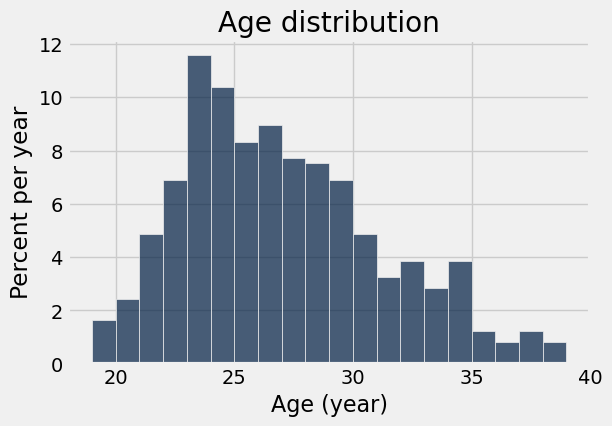

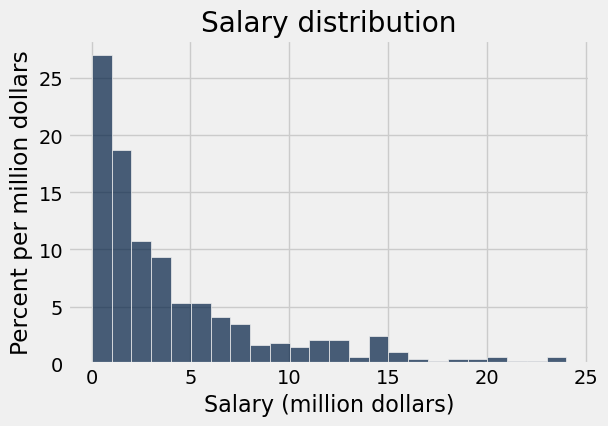

In [28]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

**Question 3.1**. Create a function called `compute_statistics` that takes a table containing an "Age" column and a "Salary" column and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary (in that order)

You can call the `histograms` function to draw the histograms! 

*Note:* More charts will be displayed when running the test cell. Please feel free to ignore the charts.


array([  2.65365854e+01,   4.26977577e+06])

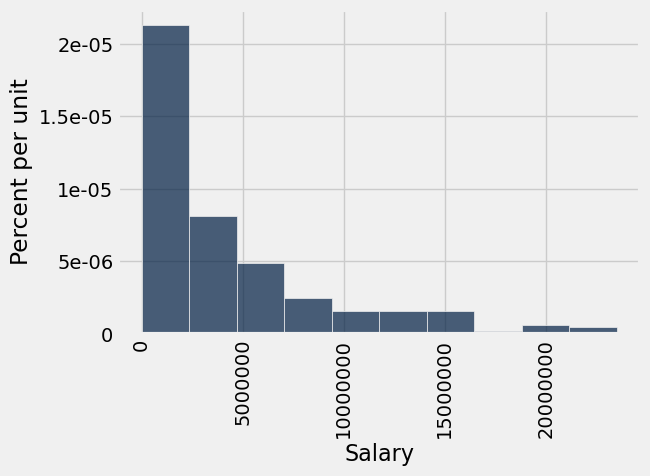

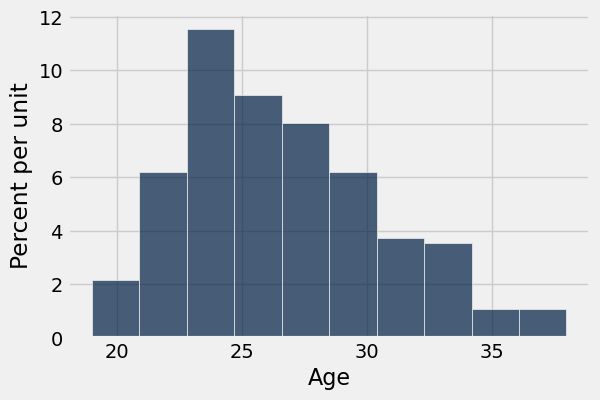

In [68]:
def compute_statistics(age_and_salary_data): #arg = a table w/ Age and Column
    salary = age_and_salary_data.select("Salary")
    age = age_and_salary_data.select("Age")
    #histograms(salary) why cant i pass a table to draw hist function?
    salary.hist("Salary")
    age.hist("Age")
    averageSalary = np.average(salary.column("Salary")) #why in decimal form?
    averageAge = np.average(age.column("Age")) #why in decimal form?
    return make_array(averageAge, averageSalary)
    

full_stats = compute_statistics(full_data)
full_stats

In [69]:
grader.check("q31")

q31 results: All test cases passed!

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. Sampling with replacement means for any row selected randomly, there is a chance it can be selected again if we sample multiple times. `Sample` takes in the sample size as its argument and returns a **table** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [62]:
# Just run this cell

salary_data.sample(5)

PlayerName,Salary
Derrick Favors,12950000
Kyle Lowry,12000000
Dwight Powell,507336
Nikola Vucevic,2751260
Danny Granger,2077000


The optional argument `with_replacement=False` can be passed through `sample()` to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to `sample()` with a sample size of 5, without replacement.

In [63]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Ryan Kelly,1650000
Nikola Vucevic,2751260
Trey Burke,2548560
Wilson Chandler,6757913
Thaddeus Young,9660869


**Question 3.2** Produce a simple random sample **without** replacement of size **44** from `full_data`. Then, run your analysis on it again by using the `compute_statistics` function.  Run the cell a few times to see how the histograms and statistics change across different samples.

- How much does the average age change across samples? 
- What about average salary?

(FYI: srs = simple random sample, wor = without replacement)

The first simple random sample without replacement gave an average age of 26.2 and an average salary of 3,755,672.09. The second simple random sample without replacement gave an average age of 27.2 and an average salary of 4,779,650.48. The third simple random sample without replacement gave an average age of 26.6 and an average salary of 3,872,313.52. The average age does not change much over the three samples. It stayed around the 26 or 27 mark for the 3 samples. Similarly, the average salary stayed around the 4 million or 3 million mark.

<!-- BEGIN QUESTION -->



array([  2.66818182e+01,   3.87231352e+06])

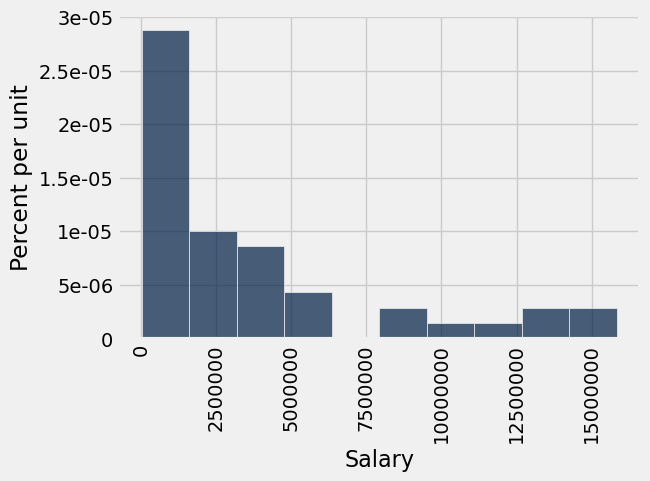

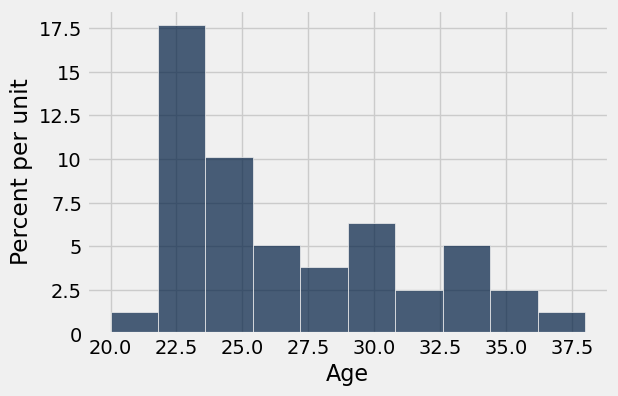

In [71]:
my_small_srswor_data = full_data.sample(44, with_replacement=False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

#averageage
#26.2045455
#27.2272727
#26.6818182

#averagesalary
#3,755,672.09
#4,779,650.48
#3,872,313.52

<!-- END QUESTION -->

## 4. More Random Sampling Practice

More practice for random sampling using `np.random.choice`.

###  Simulations and For Loops (cont.)

**Question 4.1** We can use `np.random.choice` to simulate multiple trials.

After finishing the Data 8 project, Stephanie decides to spend the rest of her night rolling a standard six-sided die. She wants to know what her total score would be if she rolled the die 1000 times. Write code that simulates her total score after 1000 rolls. 

*Hint:* First decide the possible values you can take in the experiment (point values in this case). Then use `np.random.choice` to simulate Stephanie’s rolls. Finally, sum up the rolls to get Stephanie's total score.


In [80]:
possible_point_values = np.arange(1,7) #array([1, 2, 3, 4, 5, 6])
num_tosses = 1000
total_score = 0

for i in np.arange(0, num_tosses):
    x = np.random.choice(possible_point_values)
    total_score = total_score + x
total_score

3482

In [81]:
grader.check("q41")

q41 results: All test cases passed!

### Simple random sampling (cont.)

**Question 4.2** As in the previous question, analyze several simple random samples of size 100 from `full_data` by using the `compute_statistics` function.  
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

Larger samples tend to be more accurate compared to smaller samples because they are closer to the population being studied. The histograms change less across the sample with 100 trials. The averages in the larger sample, also, seem like they are getting closer to a specific average. This makes sense because more data should emphasize the conclusions of the data.

<!-- BEGIN QUESTION -->



array([  2.56900000e+01,   3.47136214e+06])

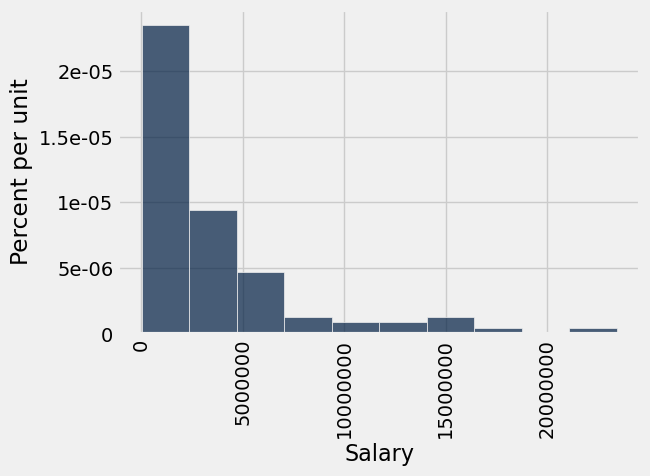

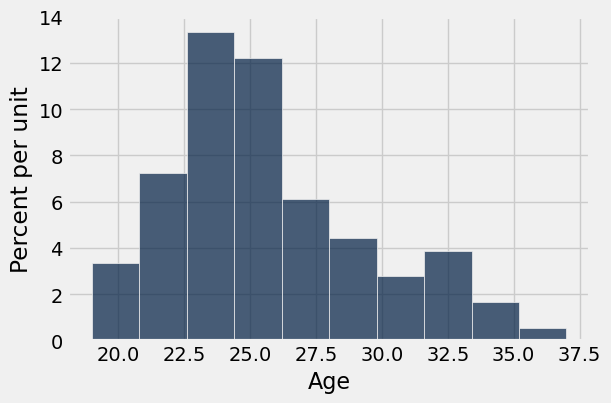

In [85]:
my_large_srswor_data = full_data.sample(100, with_replacement=False)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats

#averageage
#26.2900000
#26.9100000
#25.6900000

#averagesalary
#4,805,705.55
#3,648,926.28
#3,471,362.14


<!-- END QUESTION -->

## 5. Submission
<img src="luke_leia.jpg" alt="drawing" width="300"/>

Luke & Leia wants to congratulate you on finishing lab 5!

<img src="luke.jpg" alt="drawing" width="300"/>

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)